 Data Preprocessing, Experimental Setup and KNN Classification for Abalone fish Age Prediction

## Learning Objective :-
In this reading notebook, K-Nearest Neighbor(KNN) on the Abalone dataset was implemented where the task was to predict ‘Rings‘ from the other features of which one is categorical(sex), this feature is essentially the age of the fish.


### Importing necessary libraries
Let's start by importing all the libraries, 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import scale

###  Exploring the dataset
Abalone dataset is the most popular dataset in machine learning which is commonly used in classification problem as a benchmark for evluating the performance of various algorithms.The dataset consists of 4177 instances with 8 attributes. These typically include attributes such as the number of rings, diameter, height, and weight of the abalone. 

#### Storing the feature headings in a list

In [3]:
colnames=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'] 

#### Loading dataset using pandas and store it as dataframe

In [4]:
data = pd.read_csv('C:/Users/shrey/Downloads/abalone.csv', names=colnames, header=None)

## 1. Assessment of Data and Applying Normalization


## (1.1) Is there any missing data?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

It can be observed that the count of each feature is 4177 which is equal to the total number of instances.Furthermore, using isna() which detects missing values, we found the summation of all the missing values equal to 0. Hence, there is no missing data in the given dataset.

## (1.2) The moments or summarization statistics on the data features

In [7]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Mean and Median :

'Mean:'

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

'Median:'

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

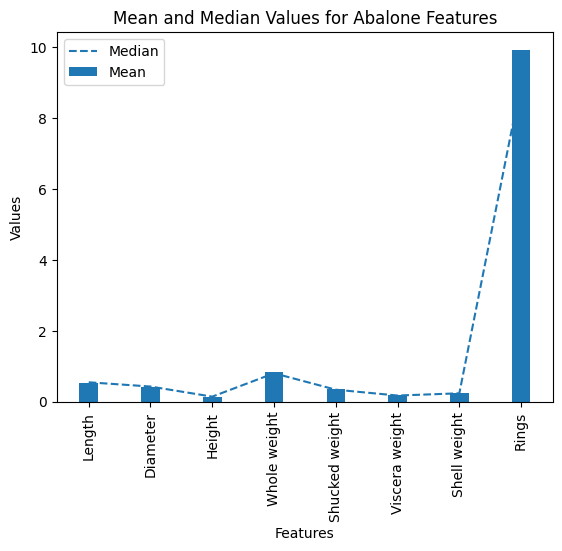

In [8]:
means = data.mean()
medians = data.median()

display('Mean:',means)
display('Median:',medians)


# Create a bar graph for the mean values
fig, ax = plt.subplots()
bar_width = 0.3
bar_means = ax.bar(means.index, means.values, bar_width, label='Mean')

# Create a line graph for the median values
ax.plot(medians.index, medians.values, '--', label='Median')

# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Mean and Median Values for Abalone Features')
ax.legend()

# Show the plot
plt.xticks(rotation=90)
plt.show()

The mean and median values provide information about the average values as well as the values in the middle of the distribution of the values for each feature. It is clear from the above bar graph that the mean and median values are similar which suggests that the distribution of values for the feature is approximately symmetrical. Additionally, this information can be useful in understanding the distribution of the values of the feature and identifying any trends or patterns in the data. 

#### Variance:

'variance:'

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64

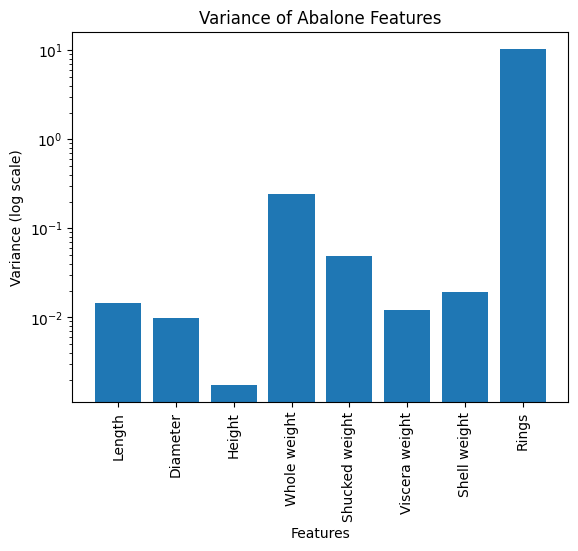

In [9]:
variances = data.var()
display('variance:', variances)
# Create a bar graph of the variance values
fig, ax = plt.subplots()
ax.bar(variances.index, variances.values)
ax.set_yscale('log')
# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Variance (log scale)')
ax.set_title('Variance of Abalone Features')

# Show the plot
plt.xticks(rotation=90)
plt.show()

The variance graph highlights the spread of values for each feature. The variance of a feature is a measure of how much the values for that feature deviate from its mean.It can be observed that the variance of all the features except for Rings is exceptionally small which indicates that the values are concentrated around the mean. 

#### Skew:

In [10]:
np.mean(data)

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

'skew'

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

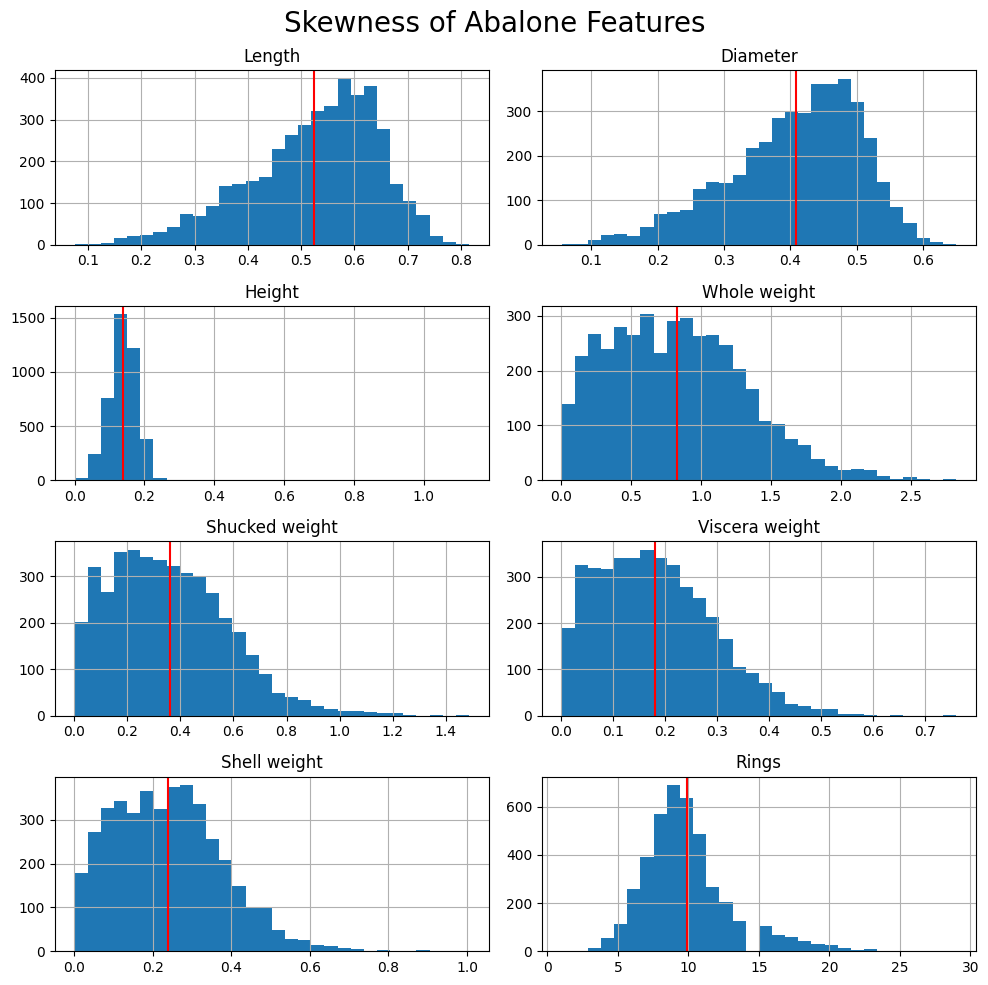

In [11]:
data.skew()
display("skew",data.skew())
k = 0
i = 0
temp = [0,0,0,1,1,0,1,1,2,0,2,1,3,0,3,1]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for x, ax in zip(colnames[1:], axs.flat): 
    data[x].hist(bins=30, ax=ax)
    ax.axvline(x=np.mean(data[x]), color='red', label='mean')
    ax.set_title(x)

plt.suptitle('Skewness of Abalone Features', fontsize=20)
plt.tight_layout()
plt.show()

As discussed earlier, the mean and median values of the features are approximately same which suggests that the distibution is symmetrical.However, it is a good practice to examine the skewness value to confirm the shape of the distribution. It can be observed that the distribution of length and diameter are nearly symmetrical with a slight left skew. Whereas, whole weight, shucked weight, viscera weight, shell weight are slightly right skewed ie; a very few data points lie to the right of the mean. 

#### Kurtosis:

'Kurtosis:'

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

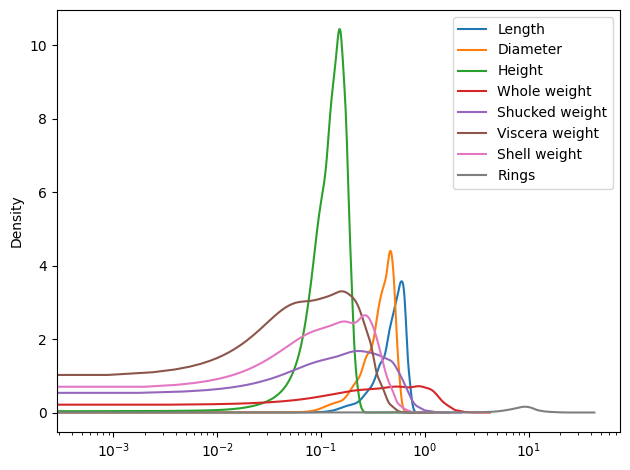

In [12]:

# Create a subplot for each feature
# fig, axs = plt.subplots(4, 2, figsize=(10, 10))
# axs = axs.ravel()

# Define the features to plot
kurt= data.kurtosis()
display('Kurtosis:',kurt)
features = ["Length", "Diameter", "Height", "Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

# Plot the KDE graph for each feature
# for i, feature in enumerate(features):
#     axs[i].set_title(feature)
#     data[feature].plot.kde(ax=axs[i])

# Show the subplot
fig,ax=plt.subplots()
for feature in features:
    data[feature].plot.kde(ax=ax,label=feature)

# Add a legend
ax.set_xscale('log')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Kurtosis is a statistical measure that describes the shape of a distribution. In a graph of kurtosis, it can highlight the tails of the distribution and provide insight into whether the distribution is platykurtic (flat), mesokurtic (normal), or leptokurtic (pointy). We observe that almost all features have kurtosis value close to zero. However, the graph suggests that the Height feature has the maximum peak which also indicates the presence of outliers in this case.

## (1.3)  Using a pairsplot (the seaborn library has a nice one, for example) to look at the whole of the datset. 

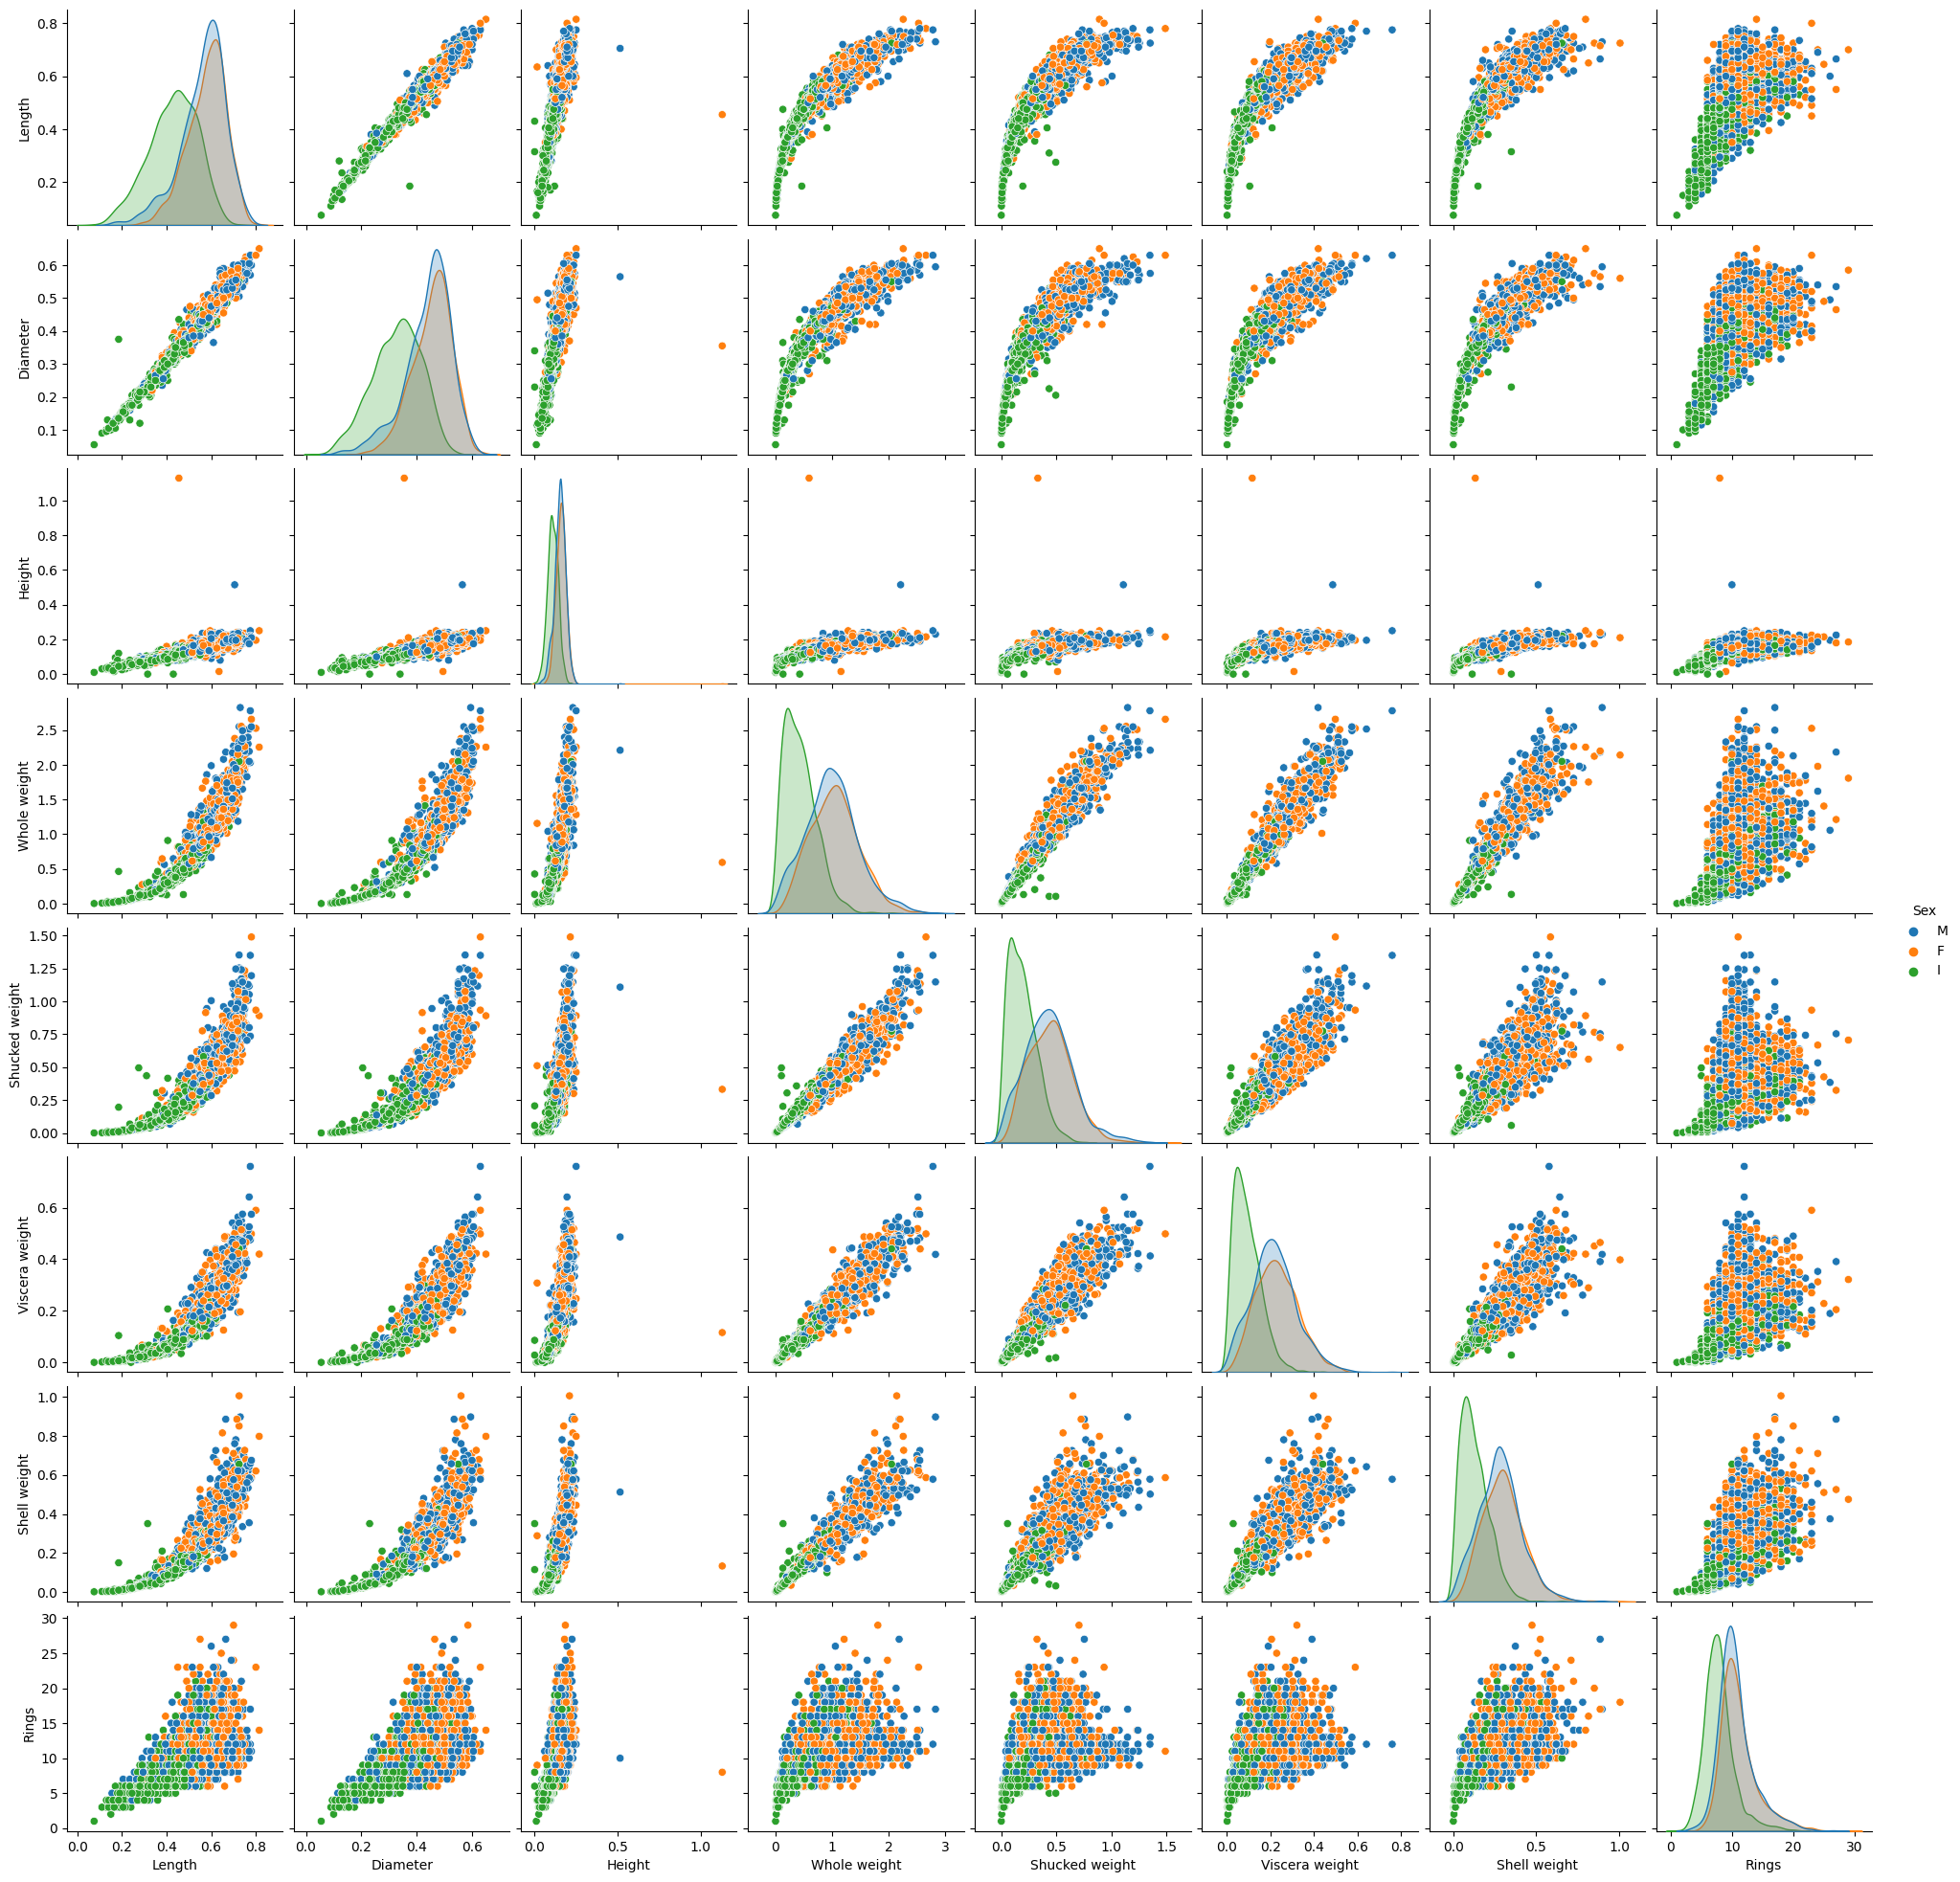

In [14]:
sns.pairplot(data,hue="Sex" )

In [15]:
cormat = data.corr()
round(cormat,4)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.0000,0.9868,0.8276,0.9253,0.8979,0.9030,0.8977,0.5567
Diameter,0.9868,1.0000,0.8337,0.9255,0.8932,0.8997,0.9053,0.5747
Height,0.8276,0.8337,1.0000,0.8192,0.7750,0.7983,0.8173,0.5575
Whole weight,0.9253,0.9255,0.8192,1.0000,0.9694,0.9664,0.9554,0.5404
Shucked weight,0.8979,0.8932,0.7750,0.9694,1.0000,0.9320,0.8826,0.4209
Viscera weight,0.9030,0.8997,0.7983,0.9664,0.9320,1.0000,0.9077,0.5038
Shell weight,0.8977,0.9053,0.8173,0.9554,0.8826,0.9077,1.0000,0.6276
Rings,0.5567,0.5747,0.5575,0.5404,0.4209,0.5038,0.6276,1.0000


The correlation coefficients of the features in the dataset are presented in the table. The correlation between the length and diameter of the features is close to 1, indicating a strong positive linear relationship between the two. As a result, either of the two features can be selected. The correlation coefficient between the diameter and Rings is slightly higher, making it the preferred choice for the first feature. 

The correlation between the height feature and all others is low, suggesting that Rings may be influenced by Height. As a result, Height is selected as the second feature.

The three weight features, Whole weight, Shucked weight, and Viscera weight, are all closely correlated with each other, but have little effect on Rings, based on the low correlation values. These features can be disregarded. Finally, as the correlation coefficient between Rings and Shell weight is the highest, Shell weight is selected as the third feature. 


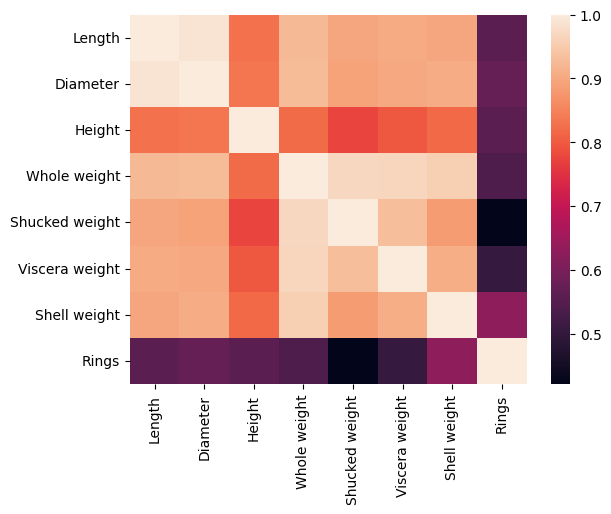

In [16]:
sns.heatmap(cormat);

Furthermore,as the correlation coefficient of Shucked weight w.r.t Rings is lowest as indicated by the black box in the heatmap. This suggests that it has a non linear relation with Rings feature and can influence the target variable, thereby choosing Shucked weight as our 4th feature. 


Overall, we selected the features as diameter, height, Shell weight, shucked weight and is assumed to have a better accuracy with these features. 

## (1.4) Is this a balanced dataset? 


No, the given dataset is not balanced. A balanced dataset is a dataset where the number of instances belonging to each class is roughly equal. To determine if the dataset is balanced, a histogram of the target variable(Rings) is plotted to evaluate the numbe rof observations in each class. 

<AxesSubplot:xlabel='Rings', ylabel='count'>

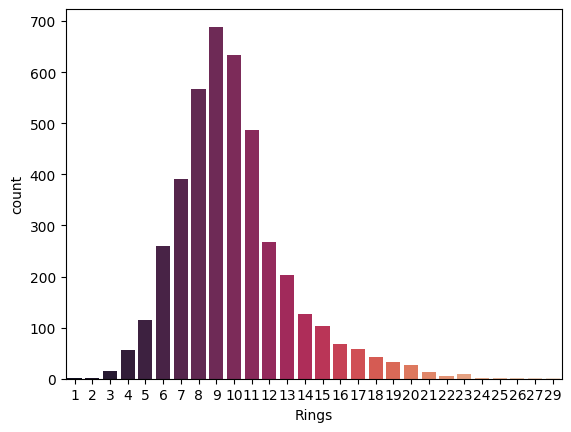

In [17]:
sns.countplot(x=data['Rings'],data=data,palette= 'rocket')

The above plot shows that the frequency of observations in each class of the target variable is significantly different from each other. Therefore, the dataset is not balanced.

**There are several ways to correct an imbalanced dataset:**

**Over-sampling:** This involves duplicating observations from the under-represented class to balance the class distribution.

**Under-sampling:** This involves removing observations from the over-represented class to balance the class distribution.

**Synthetic Data Generation:** This involves generating new synthetic samples from the under-represented class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

The method chosen depends on the specific problem, the size of the dataset, and the computational resources available. It is important to consider the trade-off between correcting the imbalance and preserving the underlying distribution of the data.

## (1.5) Normalizing the data using z-score normalization as a preprocessing step.

In [18]:
z_scaled= data.copy()


z = (x - mean) / standard deviation
where x is an individual value for the feature, mean is the mean of the feature, and standard deviation is the standard deviation of the feature.

In [19]:
for column in z_scaled.columns[1:]:
     z_scaled[column]= (z_scaled[column]-z_scaled[column].mean())/z_scaled[column].std()

In [20]:
display(z_scaled)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,1.571355
1,M,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,-0.909904
2,F,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,-0.289589
3,M,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,0.020568
4,I,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,-0.909904
...,...,...,...,...,...,...,...,...,...
4172,F,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053,0.330726
4173,M,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666,0.020568
4174,M,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895,-0.289589
4175,F,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690,0.020568


#### Calculated z score using stat module from scipy library. 

In [21]:
z_lib= data.copy()
for column in z_lib.columns[1:]:
    print(stats.zscore(z_lib[column].to_numpy()))
    

[-0.57455813 -1.44898585  0.05003309 ...  0.6329849   0.84118198
  1.54905203]
[-0.43214879 -1.439929    0.12213032 ...  0.67640943  0.77718745
  1.48263359]
[-1.06442415 -1.18397831 -0.10799087 ...  1.56576738  0.25067161
  1.32665906]
[-0.64189823 -1.23027711 -0.30946926 ...  0.70821206  0.54199757
  2.28368063]
[-0.60768536 -1.17090984 -0.4634999  ...  0.74855917  0.77334105
  2.64099341]
[-0.72621157 -1.20522124 -0.35668983 ...  0.97541324  0.73362741
  1.78744868]
[-0.63821689 -1.21298732 -0.20713907 ...  0.49695471  0.41073914
  1.84048058]
[ 1.57154357 -0.91001299 -0.28962385 ... -0.28962385  0.02057072
  0.64095986]


## Bibliography:
1. https://www.youtube.com/@dataandknowledgemodelingan75
2. https://seaborn.pydata.org/generated/seaborn.pairplot.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html